## Difference-in-Differences

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import plotnine as p

### I. Abortion Legalization and Gonorrhea incidence

In [2]:
data=pd.read_stata("https://raw.github.com/scunning1975/mixtape/master/abortion.dta")

In [3]:
data=data[~data.lnr.isnull()]
data_bf15=data[data.bf15==1]

In [4]:
formula="lnr ~ C(repeal)*C(year) + C(fip)+ acc + ir + pi + alcohol + crack + poverty + income + ur"

In [5]:
reg1=smf.wls(formula, data=data_bf15, weights=data_bf15['totpop']).fit(
        cov_type='cluster', 
        cov_kwds={'groups': data_bf15['fip']}, 
        method='pinv')

In [6]:
#reg1.summary()

In [7]:
data_plot=pd.DataFrame({'sd': reg1.bse['C(repeal)[T.1.0]:C(year)[T.1986.0]':'C(repeal)[T.1.0]:C(year)[T.2000.0]'],
        'mean': reg1.params['C(repeal)[T.1.0]:C(year)[T.1986.0]':'C(repeal)[T.1.0]:C(year)[T.2000.0]'],
        'year': range(1986, 2001)})
data_plot['errors']=data_plot['sd']*1.96

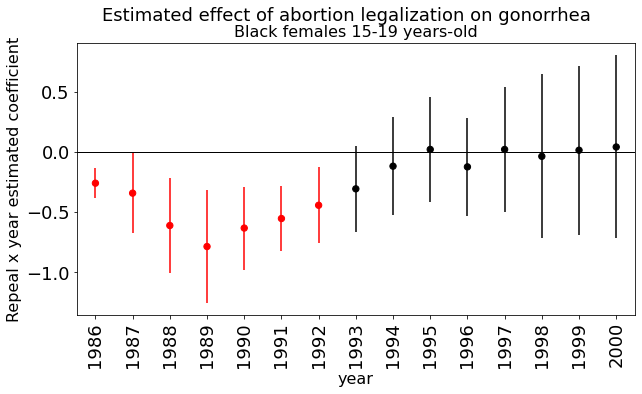

In [8]:
data_plot.plot(x='year', y='mean', kind='bar',
                 color='none', fontsize=18, 
                 ecolor=['red', 'red', 'red', 'red', 'red', 'red', 'red',
                        'black', 'black', 'black', 'black', 'black', 'black',
                        'black', 'black'],capsize=0,
                  yerr="errors", legend=False,
              figsize=(10,5))

# Set title & labels
plt.suptitle('Estimated effect of abortion legalization on gonorrhea',fontsize=18)
plt.title('Black females 15-19 years-old', fontsize=16)
plt.ylabel('Repeal x year estimated coefficient',fontsize=16)
plt.xlabel('year',fontsize=16)


# Coefficients
plt.scatter(x=np.arange(data_plot.shape[0]), 
               marker='o', s=40, 
               y=data_plot['mean'], color=['red', 'red', 'red', 'red', 'red', 'red', 'red',
                        'black', 'black', 'black', 'black', 'black', 'black',
                        'black', 'black'])   
# Line to define zero on the y-axis
plt.axhline(y=0, linestyle='-', color='black', linewidth=1)

### Questions

* Describe in your own words the testable predictions from the roll out of repeal versus Roe in the population? In other words, describe the behavior of the DD coefficients under this regression.
* Do we find evidence consistent with this in our DD analysis? List all the evidence for and against the hypothesis in this analysis.
* Does it appear that there was an effect in the period where Roe has not fully caught up?

In [9]:
data=data[~data.lnr.isnull()]

data['yr']=np.where((data['younger']==1)&(data['repeal']==1), 1, 0)
data['wm']=np.where((data['wht']==1)&(data['male']==1), 1, 0)
data['wf']=np.where((data['wht']==1)&(data['male']==0), 1, 0)
data['bm']=np.where((data['wht']==0)&(data['male']==1), 1, 0)
data['bf']=np.where((data['wht']==0)&(data['male']==0), 1, 0)

In [10]:
data_filt=data[(data.bf==1)&((data.age==15) | (data.age==25))]

In [11]:
formula="lnr ~ C(repeal)*C(year) + C(younger)*C(repeal) + C(younger)*C(year) + C(yr)*C(year) + C(fip)*t + acc + ir + pi + alcohol + crack + poverty + income + ur"

In [12]:
reg2=smf.wls(formula, data=data_filt, weights=data_filt['totpop']).fit(
        cov_type='cluster', 
        cov_kwds={'groups': data_filt['fip']}, 
        method='pinv')

In [13]:
#reg2.summary()

In [14]:
data_plot=pd.DataFrame({'sd': reg2.bse['C(yr)[T.1]:C(year)[T.1986.0]':'C(yr)[T.1]:C(year)[T.2000.0]'],
             'mean': reg2.params['C(yr)[T.1]:C(year)[T.1986.0]':'C(yr)[T.1]:C(year)[T.2000.0]'],
             'year':range(1986, 2001)})
data_plot['errors']=data_plot['sd']*1.96

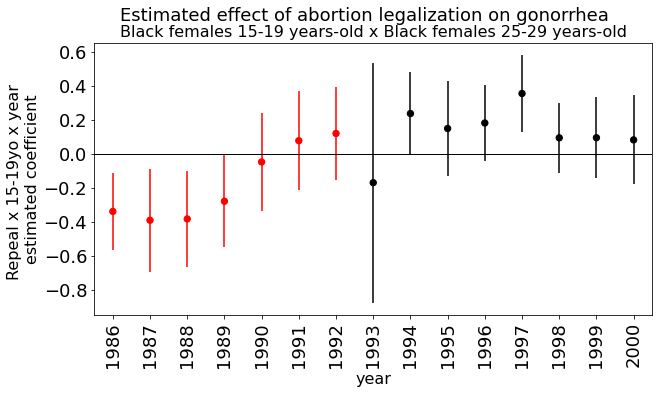

In [15]:
data_plot.plot(x='year', y='mean', kind='bar',
                 color='none', fontsize=18, 
                 ecolor=['red', 'red', 'red', 'red', 'red', 'red', 'red',
                        'black', 'black', 'black', 'black', 'black', 'black',
                        'black', 'black'],capsize=0,
                  yerr="errors", legend=False,
              figsize=(10,5))

# Set title & labels
plt.suptitle('Estimated effect of abortion legalization on gonorrhea',fontsize=18)
plt.title('Black females 15-19 years-old x Black females 25-29 years-old', fontsize=16)
plt.ylabel('Repeal x 15-19yo x year \nestimated coefficient',fontsize=16)
plt.xlabel('year',fontsize=16)

# Coefficients
plt.scatter(x=np.arange(data_plot.shape[0]), 
               marker='o', s=40, 
               y=data_plot['mean'], color=['red', 'red', 'red', 'red', 'red', 'red', 'red',
                        'black', 'black', 'black', 'black', 'black', 'black',
                        'black', 'black'])   
# Line to define zero on the y-axis
plt.axhline(y=0, linestyle='-', color='black', linewidth=1)

### Questions

* Why did we implement a triple difference? What problems does this solve and to what degree do you feel it is a necessary check?
* Describe the evidence for and against the abortion selection hypothesis when using triple difference? How is it consistent with our DD and how is it not?

In [16]:
data_filt = data[(data.race == 2) & (data.sex == 2) & (data.age == 20)]

In [17]:
formula="lnr ~ C(repeal)*C(year) + C(fip) + acc + ir + pi + alcohol+ crack + poverty+ income+ ur"

In [18]:
reg3=smf.wls(formula, 
        data=data_filt, weights=data_filt['totpop']).fit(
        cov_type='cluster', 
        cov_kwds={'groups':data_filt['fip']}, 
        method='pinv')

In [19]:
#reg3.summary()

In [20]:
data_plot=pd.DataFrame({'sd': reg3.bse['C(repeal)[T.1.0]:C(year)[T.1986.0]':'C(repeal)[T.1.0]:C(year)[T.2000.0]'],
             'mean': reg3.params['C(repeal)[T.1.0]:C(year)[T.1986.0]':'C(repeal)[T.1.0]:C(year)[T.2000.0]'],
             'year':range(1986, 2001)})
data_plot['errors']=data_plot['sd']*1.96

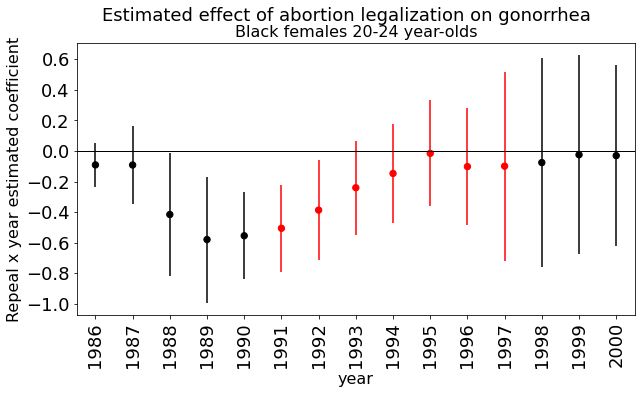

In [21]:
data_plot.plot(x='year', y='mean', kind='bar',
                 color='none', fontsize=18, 
                 ecolor=['black', 'black', 'black', 'black', 'black',
                         'red', 'red', 'red', 'red', 'red', 'red', 'red',
                         'black','black', 'black'],capsize=0,
                  yerr="errors", legend=False,
              figsize=(10,5))

# Set title & labels
plt.suptitle('Estimated effect of abortion legalization on gonorrhea',fontsize=18)
plt.title('Black females 20-24 year-olds', fontsize=16)
plt.ylabel('Repeal x year estimated coefficient',fontsize=16)
plt.xlabel('year',fontsize=16)

# Coefficients
plt.scatter(x=np.arange(data_plot.shape[0]), 
               marker='o', s=40, 
               y=data_plot['mean'], color=['black', 'black', 'black', 'black', 'black',
                         'red', 'red', 'red', 'red', 'red', 'red', 'red',
                         'black','black', 'black'])   
# Line to define zero on the y-axis
plt.axhline(y=0, linestyle='-', color='black', linewidth=1)

In [22]:
data=pd.read_stata("https://raw.github.com/scunning1975/mixtape/master/abortion.dta")

In [23]:
data=data[~data.lnr.isnull()]

In [24]:
data['younger2']=np.where((data['age']==20), 1, 0)
data['yr2']=np.where((data['younger2']==1)&(data['repeal']==1), 1, 0)
data['wm']=np.where((data['wht']==1)&(data['male']==1), 1, 0)
data['wf']=np.where((data['wht']==1)&(data['male']==0), 1, 0)
data['bm']=np.where((data['wht']==0)&(data['male']==1), 1, 0)
data['bf']=np.where((data['wht']==0)&(data['male']==0), 1, 0)

In [25]:
data_filt=data[(data.bf == 1)&((data.age==20)|(data.age==25))]

In [26]:
formula="lnr ~ C(repeal)*C(year) + C(younger2)*C(repeal) + C(younger2)*C(year) + C(yr2)*C(year) + C(fip)*t + acc + ir + pi + alcohol + crack + poverty + income + ur"

In [27]:
reg4=smf.wls(formula, 
        data=data_filt, weights=data_filt['totpop']).fit(
        cov_type='cluster', 
        cov_kwds={'groups': data_filt['fip']}, 
        method='pinv')

In [28]:
#reg4.summary()

In [29]:
data_plot=pd.DataFrame({'sd': reg4.bse['C(yr2)[T.1]:C(year)[T.1986.0]':'C(yr2)[T.1]:C(year)[T.2000.0]'],
             'mean': reg4.params['C(yr2)[T.1]:C(year)[T.1986.0]':'C(yr2)[T.1]:C(year)[T.2000.0]'],
             'year':range(1986, 2001)})
data_plot['errors']=data_plot['sd']*1.96

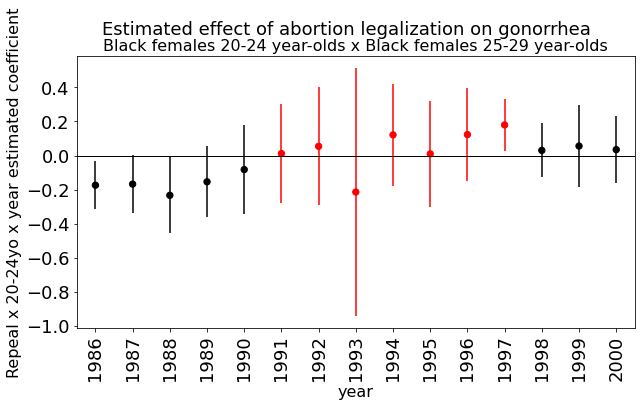

In [30]:
data_plot.plot(x='year', y='mean', kind='bar',
                 color='none', fontsize=18, 
                 ecolor=['black', 'black', 'black', 'black', 'black',
                         'red', 'red', 'red', 'red', 'red', 'red', 'red',
                         'black','black', 'black'],capsize=0,
                  yerr="errors", legend=False,
              figsize=(10,5))

# Set title & labels
plt.suptitle('Estimated effect of abortion legalization on gonorrhea',fontsize=18)
plt.title('Black females 20-24 year-olds x Black females 25-29 year-olds', fontsize=16)
plt.ylabel('Repeal x 20-24yo x year estimated coefficient',fontsize=16)
plt.xlabel('year',fontsize=16)

# Coefficients
plt.scatter(x=np.arange(data_plot.shape[0]), 
               marker='o', s=40, 
               y=data_plot['mean'], color=['black', 'black', 'black', 'black', 'black',
                         'red', 'red', 'red', 'red', 'red', 'red', 'red',
                         'black','black', 'black'])   
# Line to define zero on the y-axis
plt.axhline(y=0, linestyle='-', color='black', linewidth=1)

### Questions

* Why did we suggest that conducting this additional analysis not conducted in the original study?
* How convinced are you now of the abortion selection hypothesis? Why/why not?
* Could you have concluded this had you not exploited all of the testable predictions of the original table showing roll out across cohort and time?
* How important was our model to forming testable predictions and falsifications?

### II. Cheng and Hoekstra (2013)

In [31]:
data=pd.read_stata("https://raw.github.com/scunning1975/mixtape/master/castle.dta")

In [32]:
crime1=["jhcitizen_c", "jhpolice_c", "murder", "homicide", "robbery", 
        "assault", "burglary", "larceny", "motor", "robbery_gun_r"]
demo=["blackm_15_24", "whitem_15_24", "blackm_25_44", "whitem_25_44"]
lintrend=list(data.columns)[85:136]
region=list(data.columns)[41:85]
exocrime=["l_larceny", "l_motor"]
spending=["l_exp_subsidy", "l_exp_pubwelfare"]
xvar=["l_police", "unemployrt", "poverty", "l_income", "l_prisoner", "l_lagprisoner"]+demo+spending

In [33]:
leads=['lead9', 'lead8', 'lead7', 'lead6', 'lead5', 'lead4', 'lead3', 'lead2', 'lead1']
lags=['lag1', 'lag2', 'lag3', 'lag4', 'lag5']

In [34]:
formula="l_homicide ~ "+"+".join(region)+"+"+"+".join(leads)+"+"+"+".join(lags)+"+C(year)+C(state)"

In [35]:
event_study_formula=smf.wls(formula,
            data = data, weights = data['popwt']).fit(cov_type='cluster', cov_kwds={'groups':data['sid']})

In [36]:
#event_study_formula.summary()

In [37]:
data_plot=pd.DataFrame({'sd': list(event_study_formula.bse[leads])+list(event_study_formula.bse[lags]),
        'mean': list(event_study_formula.params[leads])+list(event_study_formula.params[lags]),
        'year': leads+lags})
data_plot['errors']=data_plot['sd']*1.96
data_plot['lb'] = data_plot['mean'] - data_plot['sd']*1.96
data_plot['ub'] = data_plot['mean'] + data_plot['sd']*1.96

/home/meliude/.local/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1840: RuntimeWarning: invalid value encountered in sqrt


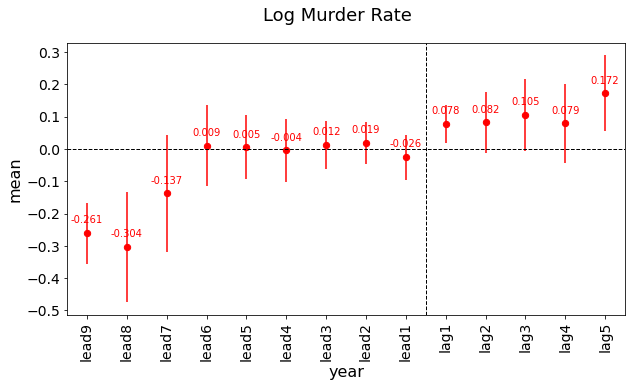

In [38]:
data_plot.plot(x='year', y='mean', kind='bar',
                 color='none', fontsize=14, 
                 ecolor=['red'],capsize=0,
                  yerr="errors", legend=False,
              figsize=(10,5))

# coefficient label
for x,y in zip(list(range(0,15)),data_plot['mean']):
    label=round(y, 3)
    plt.annotate(label,
                 (x,y), 
                 textcoords="offset points",
                 xytext=(0,10),
                 ha='center',
                color="red")

# Set title & labels
plt.suptitle('Log Murder Rate',fontsize=18)
plt.ylabel('mean',fontsize=16)
plt.xlabel('year',fontsize=16)

# Coefficients
plt.scatter(x=np.arange(data_plot.shape[0]), 
               marker='o', s=40, 
               y=data_plot['mean'], color=['red'])   
# Line to define zero on the y-axis
plt.axhline(y=0, linestyle='--', color='black', linewidth=1)
plt.axvline(x=8.5, linestyle='--', color='black', linewidth=1)

### Questions

* What effect does this analysis say reforming castle doctrine laws has on homicides?
* What are the key parts of these legislative reforms that you think may be causing this result?
* Explain what SUTVA requires in order for these estimates to be causal?
* Assume there are spillovers to neighboring states created by castle doctrine reforms. Does that imply that Cheng and Hoekstra's result is too large or too small? Why/why not?

In [39]:
formula="l_homicide ~ C(year)+C(sid)+"+"+".join(region)+"+"+"+".join(xvar)+"+"+"+".join(lintrend)+"+post"

In [40]:
event_study_formula2=smf.wls(formula,
            data=data, weights=data['popwt']).fit(cov_type='cluster', cov_kwds={'groups':data['sid']})

In [41]:
post_info=pd.DataFrame({'sd': [round(event_study_formula2.bse["post"], 3)],
        'mean': [round(event_study_formula2.params["post"], 2)]})
post_info

,sd,mean
0,0.037,0.08


In [42]:
data_plot=pd.DataFrame({'sd': list(event_study_formula.bse[leads])+[0]+list(event_study_formula.bse[lags]),
        'mean': list(event_study_formula.params[leads])+[0]+list(event_study_formula.params[lags]),
        'year': leads+['lag0']+lags})
data_plot['errors']=data_plot['sd']*1.96
data_plot['lb'] = data_plot['mean'] - data_plot['sd']*1.96
data_plot['ub'] = data_plot['mean'] + data_plot['sd']*1.96

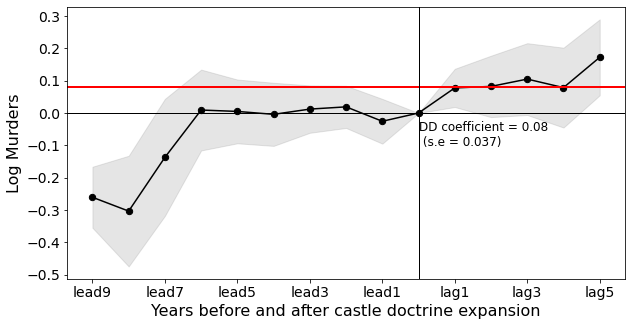

In [43]:
data_plot.plot(x='year', y='mean', kind='line',
                 color='black', fontsize=14,
                 legend=False,
            figsize=(10,5))

# Set title & labels
#plt.suptitle('Log Murder Rate',fontsize=18)
plt.ylabel('Log Murders',fontsize=16)
plt.xlabel('Years before and after castle doctrine expansion',fontsize=16)

plt.fill_between(data_plot["year"], data_plot['lb'], data_plot['ub'], color="gray", alpha=.2)
plt.text(9, -0.1, "DD coefficient = "+str(post_info['mean'][0])+"\n (s.e = "+str(post_info['sd'][0])+")",
        size=12)

# Coefficients
plt.scatter(x=np.arange(data_plot.shape[0]), 
               marker='o', s=40, 
               y=data_plot['mean'], color=['black'])   
# Line to define zero on the y-axis
plt.axhline(y=0, linestyle='-', color='black', linewidth=1)
plt.axhline(y=post_info['mean'][0], linestyle='-', color='red', linewidth=2)
plt.axvline(x=9, linestyle='-', color='black', linewidth=1)